In [1]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime
from citipy import citipy
# Import the requests library.
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the API key.
from config import weather_api_key



In [ ]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
coordinates = list(lat_lngs)

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
#cities[1]

601

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.  The following for loop isn't good enough since we are
#passing the information into a url.  Url's don't like spaces New York needs to be New+York.
#We can use enumerate to do this
#for i in range(len(cities)):
# Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50):
     #   set_count += 1
     #   record_count = 1
     #   time.sleep(60)

    # Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i]
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50):
     #   set_count += 1
     #   record_count = 1
     #   time.sleep(60)

    # Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list using enumerate.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    #if .status_code == 200:
    #    print(f"City Weather found.")
    #else:
    #    print(f"City weather not found.")
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | poum
Processing Record 6 of Set 1 | kintampo
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | husavik
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | yenagoa
Processing Record 13 of Set 1 | amderma
City not found. Skipping...
Processing Record 14 of Set 1 | yaan
Processing Record 15 of Set 1 | walvis bay
Processing Record 16 of Set 1 | lagoa
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | lorengau
Processing Record 19 of Set 1 | saint augustine
Processing Record 20 of Set 1 | cherskiy
Processing Record 21 of Set 1 | faanui
Processing Record 22 of Set 1 | cockburn town
Processing Record 23

Processing Record 35 of Set 4 | necochea
Processing Record 36 of Set 4 | torbay
Processing Record 37 of Set 4 | port lincoln
Processing Record 38 of Set 4 | cidreira
Processing Record 39 of Set 4 | afua
Processing Record 40 of Set 4 | butaritari
Processing Record 41 of Set 4 | longlac
City not found. Skipping...
Processing Record 42 of Set 4 | poya
Processing Record 43 of Set 4 | honiara
Processing Record 44 of Set 4 | hasaki
Processing Record 45 of Set 4 | saint-augustin
Processing Record 46 of Set 4 | belyy yar
Processing Record 47 of Set 4 | kuito
Processing Record 48 of Set 4 | arman
Processing Record 49 of Set 4 | bethel
Processing Record 50 of Set 4 | dingle
Processing Record 1 of Set 5 | geraldton
Processing Record 2 of Set 5 | manado
Processing Record 3 of Set 5 | bereda
Processing Record 4 of Set 5 | mehamn
Processing Record 5 of Set 5 | louisbourg
City not found. Skipping...
Processing Record 6 of Set 5 | biak
Processing Record 7 of Set 5 | tiksi
Processing Record 8 of Set 5 

Processing Record 29 of Set 8 | pontes e lacerda
Processing Record 30 of Set 8 | nandi
Processing Record 31 of Set 8 | avera
Processing Record 32 of Set 8 | manga
Processing Record 33 of Set 8 | itarema
Processing Record 34 of Set 8 | izhma
Processing Record 35 of Set 8 | andevoranto
City not found. Skipping...
Processing Record 36 of Set 8 | hoquiam
Processing Record 37 of Set 8 | kolpashevo
Processing Record 38 of Set 8 | zyryanka
Processing Record 39 of Set 8 | nipawin
Processing Record 40 of Set 8 | wonthaggi
Processing Record 41 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 42 of Set 8 | waddan
Processing Record 43 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 44 of Set 8 | cape coast
Processing Record 45 of Set 8 | novobirilyussy
Processing Record 46 of Set 8 | middelburg
Processing Record 47 of Set 8 | areka
Processing Record 48 of Set 8 | alcacer do sal
Processing Record 49 of Set 8 | kargasok
Processing Record 50 of Set 8 | simpan

Processing Record 15 of Set 12 | san rafael
Processing Record 16 of Set 12 | manaure
Processing Record 17 of Set 12 | popondetta
Processing Record 18 of Set 12 | tutoia
Processing Record 19 of Set 12 | gladstone
Processing Record 20 of Set 12 | north bend
Processing Record 21 of Set 12 | maceio
Processing Record 22 of Set 12 | kikwit
Processing Record 23 of Set 12 | perehonivka
Processing Record 24 of Set 12 | faya
Processing Record 25 of Set 12 | labuhan
Processing Record 26 of Set 12 | anchorage
Processing Record 27 of Set 12 | guanica
Processing Record 28 of Set 12 | kochevo
Processing Record 29 of Set 12 | hobyo
Processing Record 30 of Set 12 | bundaberg
Processing Record 31 of Set 12 | erdenet
Processing Record 32 of Set 12 | burnie
Processing Record 33 of Set 12 | abnub
Processing Record 34 of Set 12 | lakatoro
Processing Record 35 of Set 12 | menongue
Processing Record 36 of Set 12 | kadykchan
City not found. Skipping...
Processing Record 37 of Set 12 | flinders
Processing Recor

In [18]:
len(city_data)

552

In [19]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,8.60,92,100,4.61,CA,2022-11-23 22:42:43
1,Lebu,-37.6167,-73.6500,58.98,89,4,15.05,CL,2022-11-23 22:42:44
2,Hobart,-42.8794,147.3294,62.26,67,98,3.00,AU,2022-11-23 22:42:22
3,Mataura,-46.1927,168.8643,45.07,97,100,8.52,NZ,2022-11-23 22:42:44
4,Poum,-20.2333,164.0167,79.45,76,27,4.61,NC,2022-11-23 22:42:44


In [20]:
#Lets re-order the columns 
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity','Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2022-11-23 22:42:43,69.4541,-133.0374,8.60,92,100,4.61
1,Lebu,CL,2022-11-23 22:42:44,-37.6167,-73.6500,58.98,89,4,15.05
2,Hobart,AU,2022-11-23 22:42:22,-42.8794,147.3294,62.26,67,98,3.00
3,Mataura,NZ,2022-11-23 22:42:44,-46.1927,168.8643,45.07,97,100,8.52
4,Poum,NC,2022-11-23 22:42:44,-20.2333,164.0167,79.45,76,27,4.61


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [2]:
city_data_df = pd.read_csv('weather_data/cities.csv')

In [4]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [6]:
# Get today's date in seconds
today = time.time()
today

1669252454.451

In [7]:
today = time.strftime('%x')
today

'11/23/22'

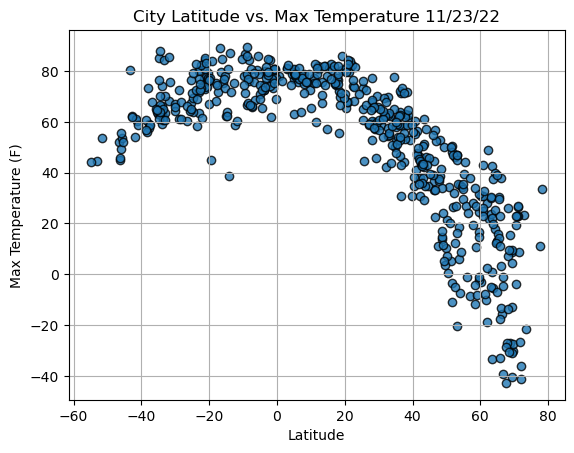

In [8]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

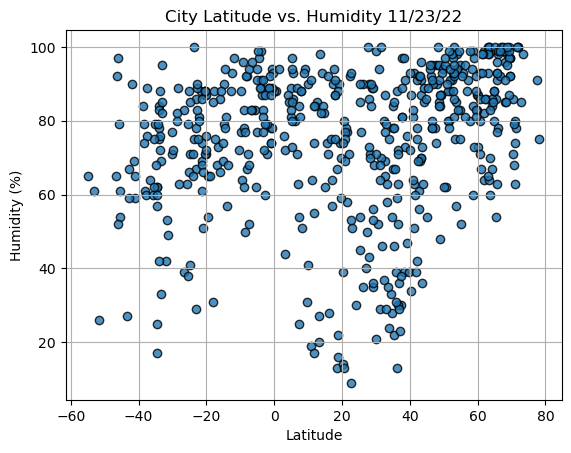

In [9]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

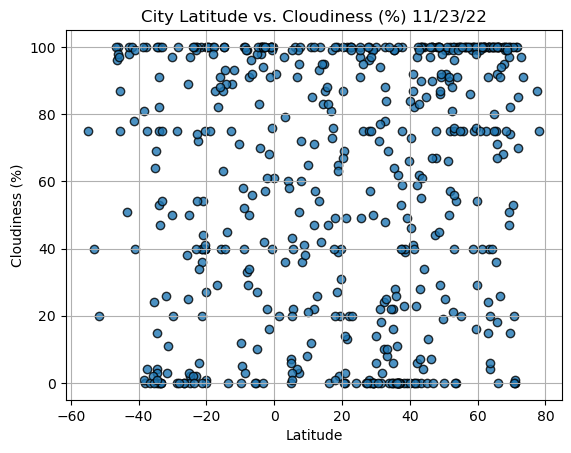

In [10]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

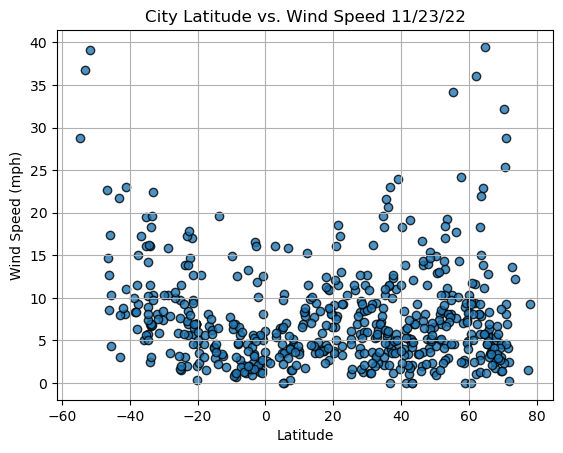

In [11]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [12]:
from scipy.stats import linregress